In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
covid_data = pd.read_csv("data/us-counties.csv", parse_dates=True)
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['mortality'] = covid_data['deaths'] / covid_data['cases']

In [10]:
wash_data = covid_data[covid_data['state'] == "Washington"]

# get most recent values
top_wa_counties = wash_data.tail(wash_data['county'].nunique()).sort_values('cases', ascending=False)

In [11]:
king_data = covid_data[covid_data['county'] == "King"]
sno_data = covid_data[covid_data['county'] == "Snohomish"]

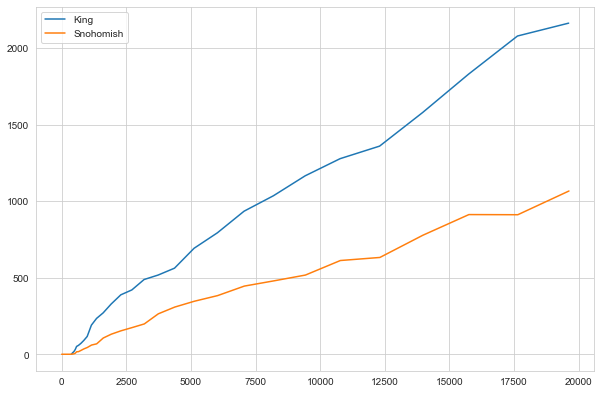

In [12]:
fig, ax = plt.subplots(figsize=(10,6.7))
sns.set_style('whitegrid')

king_data['cases'].plot(ax=ax, label="King", legend=1.0)
sno_data['cases'].plot(ax=ax, label="Snohomish", legend=1.0)

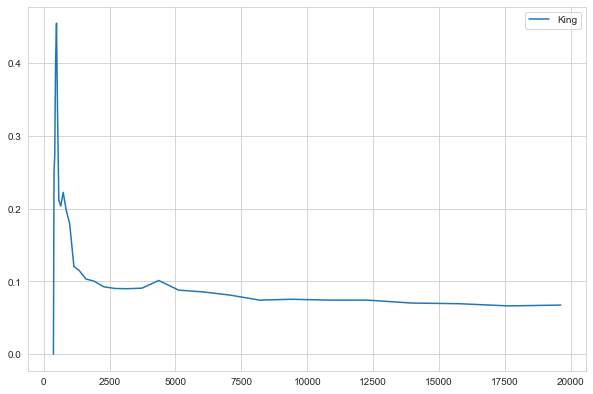

In [13]:
fig, ax = plt.subplots(figsize=(10, 6.7))
sns.set_style("whitegrid")

king_data['mortality'].plot(ax=ax, label="King", legend=1.0)

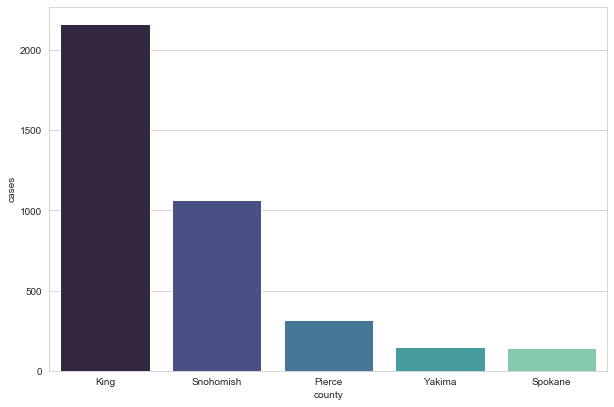

In [7]:
fig, ax = plt.subplots(figsize=(10, 6.7))
sns.set_style('whitegrid')

sns.barplot(x='county', y='cases', data=top_wa_counties.head(5), palette="mako")

Text(0.5, 0.98, 'Population Density vs # of Cases for All WA Counties')

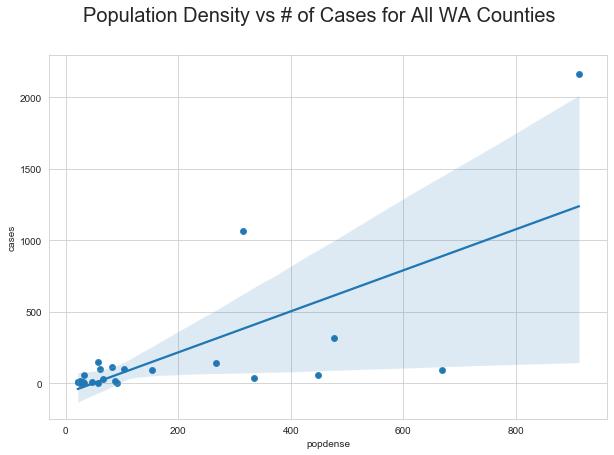

In [8]:
pop_density = [['King', 912.2],
               ['Snohomish', 314.8], 
               ['Pierce', 476.3], 
               ['Yakima', 56.6], 
               ['Spokane', 267.2],
               ['San Juan', 90.7],
               ['Clark', 667.9],
               ['Kitsap', 448.1],
               ['Thurston', 335.3],
               ['Island', 152.6],
               ['Benton', 103.4],
               ['Cowlitz', 87.5],
               ['Whatcom', 81.8],
               ['Franklin', 66.8],
               ['Skagit', 61.6],
               ['Mason', 57.8],
               ['Walla Walla', 45.8],
               ['Grant', 32.8],
               ['Grays Harbor', 32.2],
               ['Lewis', 30.9],
               ['Clallam', 27.0],
               ['San Juan', 25.5],
               ['Chelan', 24.6],
               ['Douglas', 21.2],
               ['Whitman', 21.1]]


pd_df = pd.DataFrame(pop_density, columns=['county', 'popdense'])
pd_df.head()

num_cases = []
for county in pd_df['county']:
    num_cases.append(top_wa_counties[top_wa_counties['county'] == county]['cases'].values[0])
    
pop_dense_df = pd.DataFrame(list(zip(pd_df['popdense'], num_cases)), columns=['popdense', 'cases'])
pop_dense_df.head()

fig, ax = plt.subplots(figsize=(10, 6.7))
sns.set_style('whitegrid')
sns.scatterplot(x='popdense',y='cases',data=pop_dense_df)
sns.regplot(x='popdense', y='cases', data=pop_dense_df)
plt.suptitle("Population Density vs # of Cases for All WA Counties", fontsize=20)